# 引入套件

In [91]:
import pandas as pd
import jieba.analyse
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# 1. 設定 Matplotlib 中文字體

In [92]:
# Path to the custom font
font_path = 'font/TraditionalChinese.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans TC


## 2. PPT 台積電相關貼文

網路爬蟲的技術不會在此範例中討論，在後續的範例中，我們將以爬取下來的PTT文章來說明文字分析的技術。

### 2.1 資料介紹
資料來源：
+ 工作流程平台蒐集PTT 股票版(Stock)文章
+ 關鍵字：「台積電」
+ 時間： 2023-03-20 ~ 2023-03-20
+ 資料筆數：共 2775 篇文章

讀取 ptt 檔案zh_buffet_20_22.csv

In [93]:
df = pd.read_csv('data/raw_data.csv')
df

,system_id,artUrl,artTitle,artDate,artPoster,artCatagory,artContent,artComment,e_ip,insertedDate,dataSource
0,1,https://www.ptt.cc/bbs/Stock/M.1679279576.A.D7...,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,ATF91,Stock,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,"[{""cmtStatus"": ""→"", ""cmtPoster"": ""hebeisme5566...",42.77.223.199,2023-03-21 02:21:44,ptt
1,2,https://www.ptt.cc/bbs/Stock/M.1679289787.A.D6...,[新聞]金融存股勇士進場了！9家金控股東人數創,2023-03-20 13:23:04,black1x2y3z,Stock,原文標題：金融存股勇士進場了！9家金控股東人數創史上新高\r\n原文連結：\r\nhttps...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""maxdi"", ""cmt...",140.121.145.184,2023-03-21 02:21:44,ptt
2,3,https://www.ptt.cc/bbs/Stock/M.1679292328.A.BC...,[標的]2753八方雲集鍋貼空,2023-03-20 14:05:26,Timzy,Stock,-\r\n1.發標的文未充實內文，\r\n多空理由不充實\r\n者，板規1-1-5或4-4處...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""zxcv91039"", ...",223.141.185.139,2023-03-21 02:21:49,ptt
3,4,https://www.ptt.cc/bbs/Stock/M.1679299901.A.73...,[情報]0320上市外資買賣超排行,2023-03-20 16:11:39,saber50116,Stock,1. 標題：外資買賣超排行\r\n\r\n2. 來源：台灣證交所\r\n\r\n3. 網址：...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""powerkshs"", ...",111.255.56.173,2023-03-21 02:21:49,ptt
4,5,https://www.ptt.cc/bbs/Stock/M.1679304839.A.E6...,[情報]6667信紘科111年5.11股利4.24,2023-03-20 17:33:57,a0808996,Stock,https://mops.twse.com.tw/mops/web/t146sb05\r\n...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""PeaceBoy"", ""...",123.194.132.40,2023-03-21 02:21:53,ptt
...,...,...,...,...,...,...,...,...,...,...,...
2770,2771,https://www.ptt.cc/bbs/Stock/M.1710843746.A.03...,[標的]ADM.US,2024-03-19 18:22:22,yamakazi,Stock,-\r\n1.發標的文未充實內文，\r\n多空理由不充實\r\n者，板規1-1-5或4-4處...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""gs13010"", ""c...",1.200.104.88,2024-03-20 02:05:23,ptt
2771,2772,https://www.ptt.cc/bbs/Stock/M.1710851717.A.B6...,[新聞]賴清德向竹科半導體業掛保證維持兩岸和,2024-03-19 20:35:14,humbler,Stock,原文標題：\r\n賴清德向竹科半導體業掛保證 維持兩岸和平「水電不用擔心」\r\n\r\n原...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""nvlsvee"", ""c...",111.251.205.175,2024-03-20 02:05:27,ptt
2772,2773,https://www.ptt.cc/bbs/Stock/M.1710856327.A.44...,[情報]113年03月19日信用交易統計,2024-03-19 21:52:04,steward135,Stock,1. 標題：113年03月19日信用交易統計\r\n2. 來源：臺灣證券交易所、證券櫃檯買賣...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""hong92"", ""cm...",36.224.121.61,2024-03-20 02:05:31,ptt
2773,2774,https://www.ptt.cc/bbs/Stock/M.1710862323.A.84...,[情報]0319上市櫃外資投信買超金額排行,2024-03-19 23:32:00,steveisaman,Stock,外資\r\n\r\n排行 股票名稱 百萬 收盤價 漲跌\r\n\r\n1 ...,"[{""cmtStatus"": ""推"", ""cmtPoster"": ""fernmmm"", ""c...",36.234.75.22,2024-03-20 02:05:31,ptt


### 2.2 資料初步清理
- 清除內文為空值的文章

- 透過觀察發現ptt的文章常用兩個換行符號作為句子的結尾，因此將兩個換行取代為句號。

- 清除不重要的字如換行、網址

In [94]:
clear_df = df.copy()

#去除本次不會用到的欄位
drop_cols = ['system_id', 'artUrl', 'artPoster', 'artCatagory', 'artComment', 'e_ip', 'insertedDate', 'dataSource']
clear_df.drop(drop_cols, axis = 1, inplace = True)

#去除文章內容為空值的筆數
clear_df.dropna(subset = ['artContent'], axis=0, how='any', inplace=True)

#新增['sentence']欄位，用'。'取代'\n\n'，並移除'\n'
clear_df['sentence'] = clear_df['artContent'].str.replace(r'\n\n','。', regex=True)
clear_df['sentence'] = clear_df['sentence'].str.replace(r'\n','，', regex=True)

#移除內文中的網址
clear_df['sentence'] = clear_df['sentence'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)

clear_df.head(10)

,artTitle,artDate,artContent,sentence
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,1. 標的： 00712 富時不動產\r，(例 2330.TW 台積電)\r，2. 分類：討...
1,[新聞]金融存股勇士進場了！9家金控股東人數創,2023-03-20 13:23:04,原文標題：金融存股勇士進場了！9家金控股東人數創史上新高\r\n原文連結：\r\nhttps...,原文標題：金融存股勇士進場了！9家金控股東人數創史上新高\r，原文連結：\r，\r，發布時間...
2,[標的]2753八方雲集鍋貼空,2023-03-20 14:05:26,-\r\n1.發標的文未充實內文，\r\n多空理由不充實\r\n者，板規1-1-5或4-4處...,-\r，1.發標的文未充實內文，\r，多空理由不充實\r，者，板規1-1-5或4-4處份\r...
3,[情報]0320上市外資買賣超排行,2023-03-20 16:11:39,1. 標題：外資買賣超排行\r\n\r\n2. 來源：台灣證交所\r\n\r\n3. 網址：...,1. 標題：外資買賣超排行\r，\r，2. 來源：台灣證交所\r，\r，3. 網址：\r，\...
4,[情報]6667信紘科111年5.11股利4.24,2023-03-20 17:33:57,https://mops.twse.com.tw/mops/web/t146sb05\r\n...,\r，1.提報董事會或經董事會決議日期:112/03/20\r，2.審計委員會通過日期:11...
5,[情報]112/03/20八大公股銀行買賣超排行,2023-03-20 18:28:43,1. 標題：112/03/20 八大公股銀行買賣超排行\r\n\r\n2. 來源：玩股網\r...,1. 標題：112/03/20 八大公股銀行買賣超排行\r，\r，2. 來源：玩股網\r，\...
6,[標的]敦泰3545多重啟多頭循環炒作,2023-03-20 21:19:26,-\r\n1.發標的文未充實內文，\r\n多空理由不充實\r\n者，板規1-1-5或4-4處...,-\r，1.發標的文未充實內文，\r，多空理由不充實\r，者，板規1-1-5或4-4處份\r...
7,[情報]112年03月20日信用交易統計,2023-03-20 21:47:15,1. 標題：112年03月20日信用交易統計\r\n2. 來源：臺灣證券交易所、證券櫃檯買賣...,1. 標題：112年03月20日信用交易統計\r，2. 來源：臺灣證券交易所、證券櫃檯買賣中...
8,Re:[標的]SCHWUS,2023-03-20 22:38:43,後來賣出觀察了一下\r\n\r\n發現他似乎衝不太破59這個關卡\r\n\r\n但到53 5...,後來賣出觀察了一下\r，\r，發現他似乎衝不太破59這個關卡\r，\r，但到53 54這邊又...
9,[標的]NDAQUS,2023-03-20 23:23:34,1. 標的：\r\n(例 2330.TW 台積電)\r\nNDAQ US\r\n\r\n2....,1. 標的：\r，(例 2330.TW 台積電)\r，NDAQ US\r，\r，2. 分類：...


### 2.3 斷句
中文主要以標點符號進行斷句，並清除空的字串

In [95]:
clear_df['sentence'] = clear_df['sentence'].str.split("[,，。！!？?]{1,}")

sent_df = clear_df.explode('sentence').reset_index(drop=True)

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,1. 標的： 00712 富時不動產\r
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,(例 2330.TW 台積電)\r
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,2. 分類：討論\r
3,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,\r
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,3. 分析/正文：\r
5,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,\r
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,這隻已經超過一周都大溢價8~9趴
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,股價卻沒有急速下跌
8,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,是每天凌遲你那種小小跌
9,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,明\r


### 2.4 斷詞
斷詞引擎設定：使用 Jieba 當作斷詞系統。
Jieba原先內建為簡體字字典，但我們可以使用繁體字典來做為替換，結果會比較好。   
另外可能還有一些專有名詞是沒有被包含在預設字典當中，我們也可以使用自定義字典的方式加入，或者使用參數的形式帶入。

In [96]:
# 初始化斷詞引擎：不一定要設定，只使用內建效果也可以
# 參考網址：https://raw.githubusercontent.com/ldkrsi/jieba-zh_TW/master/jieba/dict.txt
jieba.set_dictionary('dict/dict.txt')

斷詞前先將標點符號清除，並清除空字串


***正規表達式 (Regular Expression)*** 是透過簡單的特定字符規則，從文本中找尋符合對應規則的字串，幾乎常見的程式語言，都有支援正規表達式的操作。   

以下提供幾個範例：   

+ ```\d```：匹配任何一個數字字符，等同於 [0-9]

+ ```\w```：匹配任何一個單詞字符，包括字母、數字和下劃線，等同於 [a-zA-Z0-9_]

+ ```\s```：匹配任何一個空白字符，包括空格、換行等

+ ```[ ]```：用於定義一個字符集合，匹配集合中的任何一個字符。 例如: [abc] = 匹配字符 a、b 或 c。

+ ```[^ ]```：用於定義一個否定字符集合，匹配不在集合中的任何一個字符。 例如: [^abc] = 匹配除了 a、b 和 c 以外的任何字符。

+ ```+```：匹配前面提及的元素一次或多次。

更多有關正規表達式的用法可參考python官網的[介紹](https://docs.python.org/zh-tw/3/library/re.html)

In [97]:
#去除句子中除了字母、數字、空白字符以外的符號
sent_df['sentence'] = sent_df['sentence'].str.replace(r'[^\w\s]+|[\d]', '', regex=True).astype(str)

# 把長度小於1的sentence刪掉
sent_df = sent_df[sent_df["sentence"].str.len() > 1]

sent_df.head(10)

,artTitle,artDate,artContent,sentence
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的 富時不動產\r
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,例 TW 台積電\r
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分類討論\r
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析正文\r
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,這隻已經超過一周都大溢價趴
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,股價卻沒有急速下跌
8,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,是每天凌遲你那種小小跌
9,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,明\r
10,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,天除息
11,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,整年殖利率可能有趴以上


使用jieba進行斷詞

In [98]:
word_df = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#去除少於兩個字的詞語
word_df = word_df.loc[word_df['word'].str.len() > 1]

word_df.head(10)

Building prefix dict from C:\Users\eddie\GitHub\StockNatrakLanguageAnalyze\dict\dict.txt ...
Loading model from cache C:\Users\eddie\AppData\Local\Temp\jieba.u7ed60b131b91313bb12d624d6950b4ca.cache
Loading model cost 0.535 seconds.
Prefix dict has been built successfully.


,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,TW
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,台積電
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分類
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,討論
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,正文
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,已經


#### 為了進行前後比較，先透過繪製詞頻圖及文字雲觀察一下目前的資料。

### 2.5 計算去除停用字及更新字典前的詞頻

In [99]:
freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()
freq_df.head(10)

C:\Users\eddie\AppData\Local\Temp\ipykernel_23768\3460779582.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df = pd.DataFrame(pd.value_counts(word_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,台積電,7999
1,台灣,3787
2,原文,2856
3,AI,2385
4,元大,1862
5,晶片,1843
6,半導體,1834
7,公司,1817
8,市場,1731
9,標題,1728


### 2.6 視覺化結果

matplotlib 畫圖中文顯示不出來的問題

* Mac : <a href="https://blog.csdn.net/RivenDong/article/details/118990773">參考方式</a>
* Windows : <a href="https://medium.com/marketingdatascience/%E8%A7%A3%E6%B1%BApython-3-matplotlib%E8%88%87seaborn%E8%A6%96%E8%A6%BA%E5%8C%96%E5%A5%97%E4%BB%B6%E4%B8%AD%E6%96%87%E9%A1%AF%E7%A4%BA%E5%95%8F%E9%A1%8C-f7b3773a889b">參考方式</a>
* 暫存查找 path 方式：matplotlib.get_cachedir()

#### 繪製詞頻為前10高的長條圖

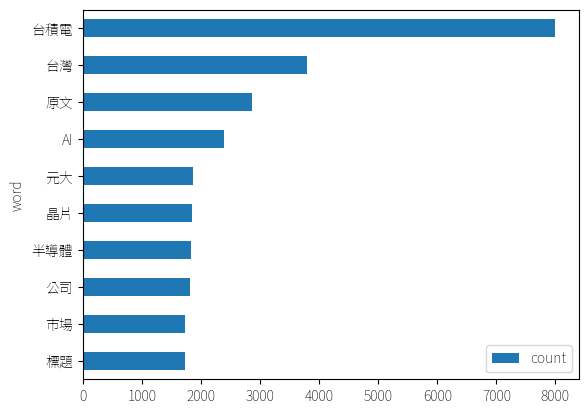

In [100]:
freq_df.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

#### 繪製文字雲

In [101]:
# wordcloud的輸入須為dict，因此先將freq_df轉換成成dict
freq_dict = freq_df.set_index('word').to_dict()
freq_dict = freq_dict['count']

freq_dict

{'台積電': 7999,
 '台灣': 3787,
 '原文': 2856,
 'AI': 2385,
 '元大': 1862,
 '晶片': 1843,
 '半導體': 1834,
 '公司': 1817,
 '市場': 1731,
 '標題': 1728,
 '台股': 1684,
 '投資': 1629,
 '美國': 1617,
 '奈米': 1479,
 '今年': 1409,
 '外資': 1404,
 '內容': 1384,
 '股息': 1383,
 '心得': 1372,
 '時間': 1335,
 '記者': 1296,
 '排行': 1279,
 '營收': 1259,
 '國泰': 1223,
 '股價': 1218,
 '股票': 1203,
 '製程': 1187,
 '標的': 1185,
 '中國': 1138,
 '表示': 1070,
 '發布': 1058,
 '資增': 1037,
 'KY': 1028,
 '產業': 1021,
 '券增': 1014,
 '買超': 1006,
 '可能': 1000,
 '目前': 999,
 '連結': 994,
 '賣超': 985,
 '指數': 983,
 '評論': 980,
 '來源': 975,
 '交易': 954,
 '就是': 937,
 '署名': 924,
 '長期': 919,
 '技術': 918,
 '可以': 896,
 '富邦': 893,
 '現在': 882,
 'ETF': 877,
 '緯創': 874,
 '美債': 865,
 '億元': 848,
 '聯電': 837,
 '成長': 830,
 '先進': 826,
 '需求': 824,
 '科技': 824,
 '機制': 807,
 '未來': 807,
 'TW': 785,
 '全球': 783,
 '內文': 772,
 '投信': 767,
 '沒有': 767,
 '去年': 763,
 '指出': 760,
 '客戶': 751,
 '預期': 749,
 '廣達': 744,
 '以上': 741,
 '證券': 728,
 '聯發科': 719,
 '持續': 719,
 '網址': 719,
 '報導': 706,
 '輝達': 702,
 '開始': 684,

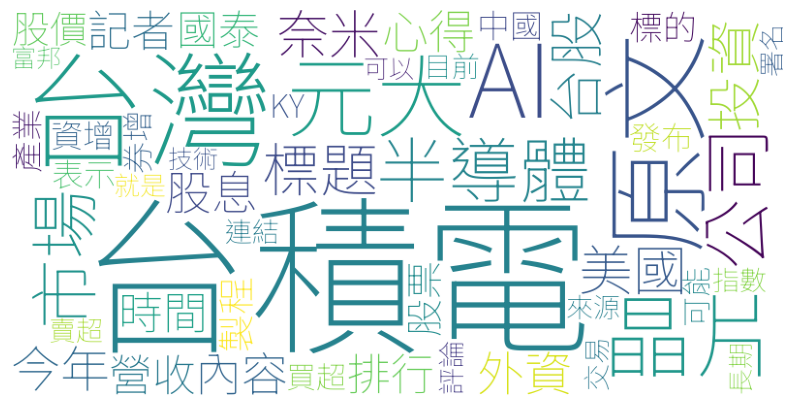

In [102]:
# 繪製文字雲
wordcloud = WordCloud(background_color = 'white', width = 800, height = 400, max_words = 50, font_path = font_path)
wordcloud.generate_from_frequencies(freq_dict)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.7 移除停用字

In [103]:
# 以檔案形式匯入通用的停用字檔案
# 將stopwords存成list
stopwords = [line.strip() for line in open('dict/stopwords.txt', 'r', encoding='utf-8').readlines()] 

移除dataframe中的停用字

In [104]:
noStop_df = word_df[~word_df['word'].isin(stopwords)]
noStop_df.head(10)

,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,TW
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分類
2,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,討論
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,正文
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,超過
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,一周


### 計算去除停用字後的詞頻

#### 再次繪製長條圖

C:\Users\eddie\AppData\Local\Temp\ipykernel_23768\1312150138.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()


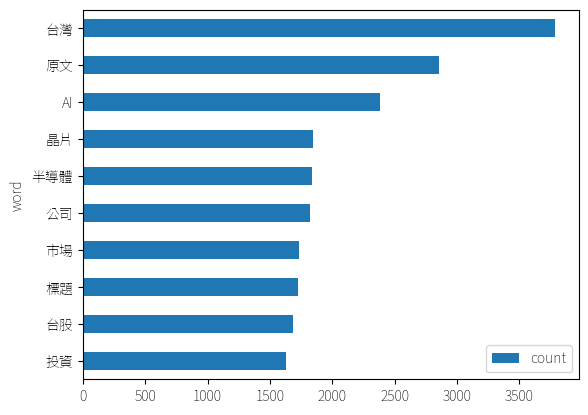

In [105]:
freq_df_nostop = pd.DataFrame(pd.value_counts(noStop_df['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_nostop.head(10).plot.barh(x = 'word', y = 'count').invert_yaxis()
plt.show()

#### 再次繪製文字雲

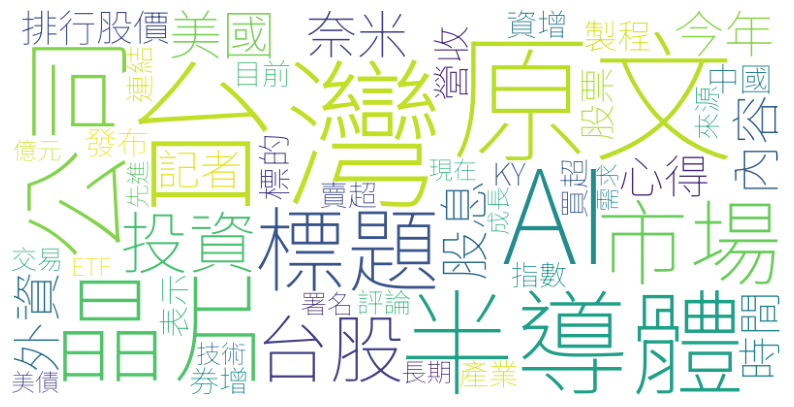

In [106]:
freq_dict_nostop = freq_df_nostop.set_index('word').to_dict()
freq_dict_nostop = freq_dict_nostop['count']

# 繪製文字雲
wordcloud_nostop = WordCloud(background_color = 'white', width = 800, height = 400, font_path = font_path, max_words = 50)
wordcloud_nostop.generate_from_frequencies(freq_dict_nostop)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_nostop)
plt.axis('off')
plt.show()

### 2.8 更新停用字字典

In [107]:
# 參數形式手動加入停用字
stopwords_manual = ["原文", "標題", "今年", "來源", "公司", "評論", "署名", "內容時間", "現在", "連結", "目前", "股票",
                    "股價", "台積電", "台積", "台股", "台灣", "台灣股市", "台灣股票", "台灣股價", "台灣股票市場",
                    "台灣股市", "內容", "評論", "文章", "內文", "記者", "指出", "心得", "來源", "市場", "表示", "去年",
                    "預期", "億元", "TW", "持續", "未來", "產業", "券增", "排行", "證券", "今天", "報導", "分類",
                    "網址", "時間", "客戶", "認為", "討論", "張數", "相關", "影響", "機制", "億美元", "美元", "企業",
                    "金額", "資料", "發布", "格式", "投資"]

stopwords.extend(stopwords_manual)

In [108]:
noStop_df_2 = noStop_df[~noStop_df['word'].isin(stopwords)]
noStop_df_2.head(10)

,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,正文
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,超過
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,一周
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,溢價
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,急速
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,下跌


### 2.9 更新斷詞字典
更新斷詞字典有兩種方法

a. 自行定義的斷詞字典

In [109]:
# 載入自定義辭典：一個詞一行，每行分詞語、詞頻(可省)、詞性(可省)
jieba.load_userdict("dict/user_dict.txt")

#### 重新斷詞

In [110]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]
word_df_updated

,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,TW
1,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,台積電
...,...,...,...,...
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,JPTT
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,on
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,my
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,Samsung


#### 重新移除停用字

In [111]:
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated

,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,正文
...,...,...,...,...
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,JPTT
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,on
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,my
238508,[標的]6667信紘科海外擴大營運多,2024-03-19 23:48:36,1. 標的： 6667 信紘科\r\n\r\n2. 分類：多/空/請益/心得\r\n\r\n...,Samsung


將字詞加入斷詞字典中可以設定該詞的詞頻，如果一個新詞的詞頻較高，它將更有可能被視為一個獨立的單詞，而不是被切分為多個子詞。   

接下來我們試試看在斷詞字典中加入詞頻的話會怎麼樣

In [112]:
# 加入斷詞字典
jieba.add_word('金融市場', freq=500)

# 查看目前出現幾次
nostop_df_updated[nostop_df_updated['word'] == '金融市場']['word'].count()

13

重新進行斷詞及清除停用字

In [113]:
# sent_df是還沒斷詞過的df
word_df_updated = sent_df.assign(word = sent_df['sentence'].apply(jieba.lcut)).explode('word').drop(['sentence'], axis=1)

#把長度小於1的row刪掉
word_df_updated = word_df_updated.loc[word_df_updated['word'].str.len()>1]

#去除停用字
nostop_df_updated = word_df_updated[~word_df_updated['word'].isin(stopwords)]

nostop_df_updated.head(10)

,artTitle,artDate,artContent,word
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,標的
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,富時
0,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,不動產
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,分析
4,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,正文
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,超過
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,一周
6,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,溢價
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,急速
7,[標的]00712富時不動產天天大溢價要賣？,2023-03-20 10:32:54,1. 標的： 00712 富時不動產\r\n(例 2330.TW 台積電)\r\n2. 分類...,下跌


In [114]:
# 查看調整詞頻之後出現幾次
nostop_df_updated[nostop_df_updated['word'] == '金融市場']['word'].count()

13

經過比對可以看到該詞的數量上升，代表該詞更加精準地被拆分了出來。

#### 重新計算詞頻

In [115]:
freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()

freq_df_updated

C:\Users\eddie\AppData\Local\Temp\ipykernel_23768\2024435358.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_df_updated = pd.DataFrame(pd.value_counts(nostop_df_updated['word'])).sort_values(by = ['count'], ascending = False).reset_index()


,word,count
0,AI,2385
1,晶片,1843
2,半導體,1834
3,美國,1617
4,奈米,1479
...,...,...
35175,Suk,1
35176,碰不到,1
35177,收乾,1
35178,進一位,1


#### 重新繪製詞頻長條圖

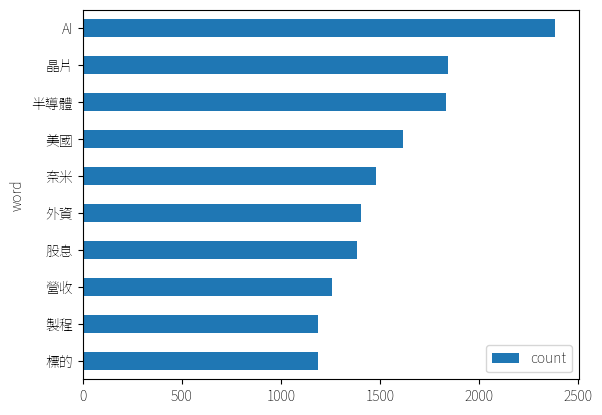

In [116]:
freq_df_updated.head(10).plot.barh(x='word', y='count').invert_yaxis()
plt.show()

#### 繪製文字雲

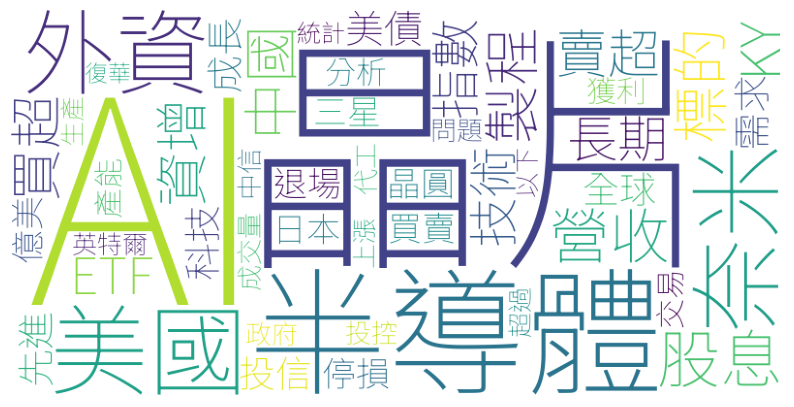

In [117]:
freq_dict_updated = freq_df_updated.set_index('word').to_dict()
freq_dict_updated = freq_dict_updated['count']

# 繪製文字雲
wordcloud_after = WordCloud(background_color='white', width=800, height = 400, font_path = font_path, max_words = 50)
wordcloud_after.generate_from_frequencies(freq_dict_updated)

plt.figure(figsize = (10,7))
plt.imshow(wordcloud_after)
plt.axis('off')
plt.show()

### 2.10 比較清理前後的文字雲

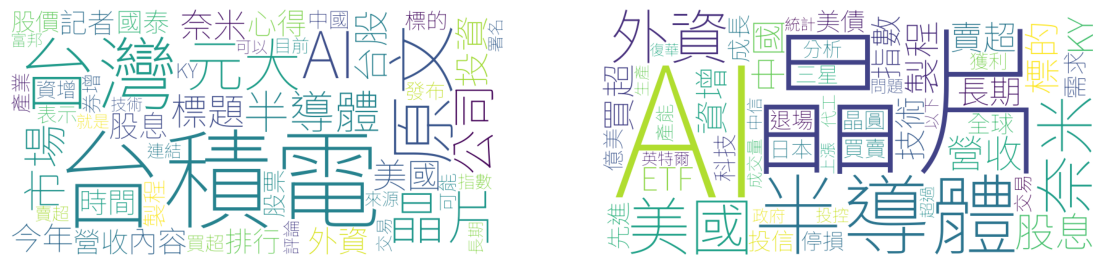

In [118]:
plt.figure(figsize = (14,8))

plt.subplot(1,2,1)
plt.imshow(wordcloud)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_after)
plt.axis('off')

plt.show()

儲存clean data，以便後續其他使用

In [119]:
nostop_df_updated.to_csv("data/clean_data.csv", encoding = 'utf-8',index = False)

資料清理的過程往往是花費做多時間的工程，因為在做完第一次的斷詞、正規化、清除停用字後，我們會發現還是會有許多不重要的字沒有被清理到，或是有些兩個字以上的專有名詞、名詞片語被斷開，因此在進行資料分析前，必須不斷經歷以上過程，更新停用字、字典，以便在後續的分析中能得到重要且正確的分析結果

In [120]:
!pip freeze > requirements.txt